In [2]:
import os
import numpy as np
import nibabel as nib
from nilearn.image import crop_img
import matplotlib.pyplot as plt

# Internal imports from /Data/rabalabqc directory
import sys
sys.path.append('/home/mac/pmaiti/Desktop/leads_qc/rablabqc')
from slice_selector import SliceSelector
from processing import ImageProcessor
from plotter import generate_qc, generate_qc_with_overlay
from freesurferlut import FreeSurferColorLUT

from matplotlib.colors import LinearSegmentedColormap
cmap_red = LinearSegmentedColormap.from_list('custom_red', [(1, 0, 0), (1, 0, 0)], N=256)
cmap_red.set_under(alpha=0)  # Set transparency for zeros

cmap_yellow = LinearSegmentedColormap.from_list('custom_yellow', [(1, 1, 0), (1, 1, 0)], N=256)
cmap_yellow.set_under(alpha=0)  # Set transparency for zeros

cmap_turbo = plt.cm.turbo
cmap_turbo.set_under(alpha=0.1)  # Set transparency for zeros

cmap_gray = plt.cm.gray
cmap_gray.set_under(alpha=0)  # Set transparency for zeros


In [3]:
processed_path = '/home/mac/pmaiti/Desktop/leads_qc/mimic_processed/'

# MRI
nu_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/MRI_T1_2020-02-18','LDS3600262_MRI_T1_2020-02-18_nu.nii')
nu_img = nib.load(nu_file).get_fdata()

# Read the nifti file
raparc_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/MRI_T1_2020-02-18','LDS3600262_MRI_T1_2020-02-18_raparc+aseg.nii')
raparc_img = nib.load(raparc_file).get_fdata()

# PET
rpet_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/FBB_2020-02-25','rLDS3600262_FBB_2020-02-25.nii')
rpet_image = nib.load(rpet_file).get_fdata()

suvr_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/FBB_2020-02-25','LDS3600262_FBB_2020-02-25_suvr_cbl.nii')
suvr_image = nib.load(suvr_file).get_fdata()

# c1 
c1_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/MRI_T1_2020-02-18','c1LDS3600262_MRI_T1_2020-02-18_nu.nii')
c1_image = nib.load(c1_file).get_fdata()

# affine warped
affine_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/MRI_T1_2020-02-18','w_affineLDS3600262_MRI_T1_2020-02-18_nu.nii')
affine_image = nib.load(affine_file).get_fdata()

# tpm 
tpm_file = '/home/mac/pmaiti/Desktop/leads_qc/rablabqc/rTPM.nii'
tpm_image = nib.load(tpm_file).get_fdata()

# reference region images
wcbl_ref_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/FBB_2020-02-25','wholecbl_ref_mask.nii')
wcbl_ref_image = nib.load(wcbl_ref_file).get_fdata()

compwm_ref_file = os.path.join(processed_path, 'LDS3600262/Timepoint1/FBB_2020-02-25','compwm_ref_mask.nii')
compwm_ref_image = nib.load(compwm_ref_file).get_fdata()


## Slice Selections

In [4]:
select_axial_slices, select_coronal_slices, select_sagittal_slices = SliceSelector(raparc_img).select_leads_slices()
select_tpm_axial_sllices = [32,55,75,90,120, 145]
select_tpm_coronal_slices = [83,140]
select_tpm_sagittal_slices = [140, 150]

In [5]:
# To check the label indices for a roi searched with full or partial ROI names
FreeSurferColorLUT().get_label_index_name('hippo')

# Selecting the sagittal slices
SliceSelector(raparc_img).select_slices(axis='x', label_indices = [17,53],percentile=0.5)

 Label                                            ROI
    17                               Left-Hippocampus
    53                              Right-Hippocampus
   106         Left-hippocampus-intensity-abnormality
   115        Right-hippocampus-intensity-abnormality
   193                       Left-hippocampal_fissure
   197                      Right-hippocampal_fissure
   215                            hippocampal_fissure
   505                      right_hippocampal_fissure
   555                       left_hippocampal_fissure
  1016                         ctx-lh-parahippocampal
  2016                         ctx-rh-parahippocampal
  3016                          wm-lh-parahippocampal
  4016                          wm-rh-parahippocampal
  1119 ctx-lh-G_occipit-temp_med-Parahippocampal_part
  2119 ctx-rh-G_occipit-temp_med-Parahippocampal_part
  3119  wm-lh-G_occipit-temp_med-Parahippocampal_part
  4119  wm-rh-G_occipit-temp_med-Parahippocampal_part
  7012           Hippocampal

143

In [ ]:
# Adding the affine image to the plot
fig, axs = plt.subplots(4, 10, figsize=(100, 70))

### Title of the figure
fig.suptitle('Subject ID', fontsize=200, color = 'white')

for i, slice_number in enumerate(select_axial_slices):
    axs[0,i].imshow(ImageProcessor.brain_padding(nu_img[:,:,slice_number], height_padding=1), cmap='gray', vmax = 140)
    axs[0,i].axis('off')
axs[0,0].set_title('MRI(nu)', fontsize=100, color = 'white', pad = 20, loc = 'left')

i = i+1
for k, slice_number in enumerate(select_sagittal_slices):
    _, image2 = ImageProcessor.brain_padding(raparc_img[slice_number,:,:], nu_img[slice_number,:,:], width_padding=30, height_padding=25)
    axs[0,i+k].imshow(image2, cmap='gray', vmax = 140)
    axs[0,i+k].axis('off')

k = k+1
for j, slice_number in enumerate (select_coronal_slices):
    _, image2 = ImageProcessor.brain_padding(raparc_img[:,slice_number,:], nu_img[:,slice_number,:], width_padding = 30, height_padding=25)
    axs[0,i+k+j].imshow(image2, cmap='gray', vmax = 140)
    axs[0,i+k+j].axis('off')

#################### Plotting MRI - aparc + aseg ####################
    
for i, slice_number in enumerate(select_axial_slices):
    pad_image, overlay =  ImageProcessor.brain_padding(nu_img[:,:,slice_number],raparc_img[:,:,slice_number], height_padding=0)
    axs[1,i].imshow(pad_image, cmap='gray',vmax = 140)
    axs[1,i].imshow(ImageProcessor.mask_image(overlay),  cmap = cmap_red, vmin = 0.5, vmax = 1)
    axs[1,i].axis('off')
axs[1,0].set_title('MRI(nu) - aparc + aseg', fontsize=100, color = 'white', pad = 20, loc = 'left')

i = i+1

for k, slice_number in enumerate(select_sagittal_slices):
    image1, image2 = ImageProcessor.brain_padding(raparc_img[slice_number,:,:], nu_img[slice_number,:,:], width_padding=30, height_padding=25)
    axs[1,i+k].imshow(image2, cmap='gray', vmax = 140)
    axs[1,i+k].imshow(ImageProcessor.mask_image(image1),  cmap = cmap_red, vmin = 0.5, vmax = 1)
    axs[1,i+k].axis('off')
k=k+1
for j, slice_number in enumerate (select_coronal_slices):
    image1, image2 = ImageProcessor.brain_padding(raparc_img[:,slice_number,:], nu_img[:,slice_number,:], width_padding=30, height_padding=25)
    axs[1,i+k+j].imshow(image2, cmap='gray')
    axs[1,i+k+j].imshow(ImageProcessor.mask_image(image1),  cmap = cmap_red, vmin = 0.5, vmax = 1)
    axs[1,i+k+j].axis('off')

#################### Plotting MRI - c1 ####################
    
for i, slice_number in enumerate(select_axial_slices):
    pad_image, overlay =  ImageProcessor.brain_padding(nu_img[:,:,slice_number],c1_image[:,:,slice_number], height_padding=0)
    axs[2,i].imshow(pad_image, cmap='gray')
    axs[2,i].imshow(ImageProcessor.mask_image(overlay,lower_threshold=0.3, upper_threshold=1),  cmap = cmap_red, vmin = 0.5, vmax = 1)
    axs[2,i].axis('off')
axs[2,0].set_title('MRI(nu) - c1', fontsize=100, color = 'white', pad = 20, loc = 'left')

i = i+1

for k, slice_number in enumerate(select_sagittal_slices):
    _, image1 = ImageProcessor.brain_padding(raparc_img[slice_number,:,:], c1_image[slice_number,:,:], width_padding=30, height_padding=25)
    _, image2 = ImageProcessor.brain_padding(raparc_img[slice_number,:,:], nu_img[slice_number,:,:], width_padding=30, height_padding=25)
    axs[2,i+k].imshow(image2, cmap='gray')
    axs[2,i+k].imshow(ImageProcessor.mask_image(image1,lower_threshold=0.3, upper_threshold=1),  cmap = cmap_red, vmin = 0.5, vmax = 1)
    axs[2,i+k].axis('off')

k = k+1
for j, slice_number in enumerate (select_coronal_slices):
    _, image1 = ImageProcessor.brain_padding(raparc_img[:,slice_number,:], c1_image[:,slice_number,:], width_padding = 30, height_padding=25)
    _, image2 = ImageProcessor.brain_padding(raparc_img[:,slice_number,:], nu_img[:,slice_number,:], width_padding = 30, height_padding=25)
    axs[2,i+k+j].imshow(image2, cmap='gray')
    axs[2,i+k+j].imshow(ImageProcessor.mask_image(image1, lower_threshold=0.3, upper_threshold=1), cmap=cmap_red, vmin=0.1, vmax=1)
    axs[2,i+k+j].axis('off')  

#################### Plotting waffine MRI - TPM ####################

for i,slice_number in enumerate(select_tpm_axial_sllices):
    image1, image2 = ImageProcessor.brain_padding(affine_image[:,:,slice_number],tpm_image[:,:,slice_number], height_padding=0,width_padding=0)
    axs[3,i].imshow(image1, cmap='gray')
    axs[3,i].imshow(ImageProcessor.mask_image(image2, lower_threshold=0.1, upper_threshold=0.3), cmap=cmap_red, vmin=0.1, vmax=1, alpha=0.4)
    axs[3,i].axis('off')

i = i+1
for j, slice_number in enumerate(select_tpm_coronal_slices):
    image1, image2 = ImageProcessor.brain_padding(affine_image[:,slice_number,:],tpm_image[:,slice_number,:], height_padding=0,width_padding=0)
    axs[3,i+j].imshow(image1, cmap='gray')
    axs[3,i+j].imshow(ImageProcessor.mask_image(image2, lower_threshold=0.1, upper_threshold=0.3), cmap=cmap_red, vmin=0.1, vmax=1, alpha=0.4)
    axs[3,i+j].axis('off')

j= j+1

for k, slice_number in enumerate(select_tpm_sagittal_slices):
    image1, image2 = ImageProcessor.brain_padding(affine_image[slice_number,:,:],tpm_image[slice_number,:,:], height_padding=0, width_padding=0)
    axs[3,i+j+k].imshow(image1, cmap='gray')
    axs[3,i+j+k].imshow(ImageProcessor.mask_image(image2, lower_threshold=0.1, upper_threshold=0.3), cmap=cmap_red, vmin=0.1, vmax=1, alpha=0.4)
    axs[3,i+j+k].axis('off')
    
fig.patch.set_facecolor('black')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
#plt.savefig('MRI.png', dpi = 300, bbox_inches = 'tight')

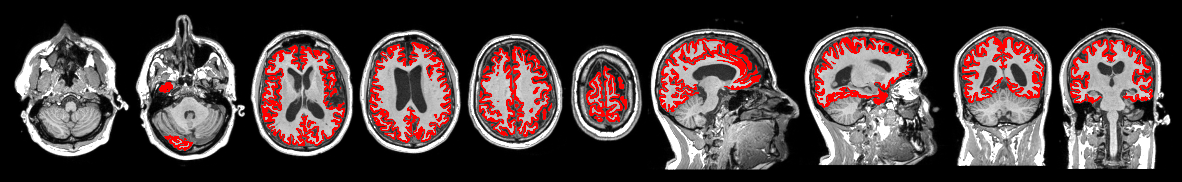

In [6]:

# Create a combined image of all selected slices
underlay, overlay = generate_qc_with_overlay(nu_img, select_axial_slices, select_sagittal_slices, select_coronal_slices, mask_upper_threshold=2000, mask_lower_threshold=1000, overlay_img=raparc_img)

plt.figure(figsize=(15, 5))
plt.imshow(underlay, cmap='gray', vmax=140)
plt.imshow(overlay, cmap=cmap_red, vmin=0.5, vmax=1)
fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('black')  # Set the background color of the figure
plt.axis('off')
plt.show()


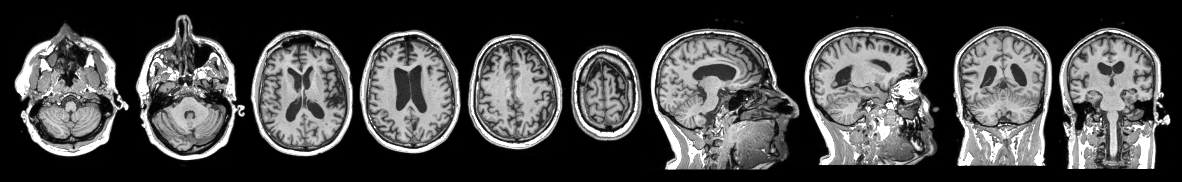

In [7]:

# Create a combined image of all selected slices
underlay = generate_qc_with_overlay(nu_img, select_axial_slices, select_sagittal_slices, select_coronal_slices, mask_upper_threshold=0, mask_lower_threshold=0)

plt.figure(figsize=(15, 5))
plt.imshow(underlay, cmap='gray', vmax=140)
fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('black')  # Set the background color of the figure
plt.axis('off')
plt.show()
